# Traffic Sign Generation
In the Traffic Sign Classification project, we are supposed to use what we've learned about deep neural networks and convolutional neural networks to classify traffic signs (from the 
[German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)).

The classes are highly imbalanced, which affects the ability to train a classifier.  We 
could undersample the over-represented classes here, but we could also use some oversampling technique,
such as [SMOTE](https://beckernick.github.io/oversampling-modeling/).

But why not attempt to oversample by using a Generative Adversarial Network (GAN) using what
I learned in the Deep Learning Nanodegree?  :-p

## Update TensorFlow
For some reason, the Self-Driving Car "CarND starter kit" AMI uses TF 0.12.

In [3]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
#assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
#print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
#if not tf.test.gpu_device_name():
#    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
#else:
#    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

KeyError: "Couldn't find field google.protobuf.DescriptorProto.ExtensionRange.options"

## Get the Data

In [ ]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Explore the Data

In [29]:
# Import Some Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Class Imbalance

In [78]:
label_names = pd.read_csv('signnames.csv')
label_names['Training Frequency'] = [np.round(100*len(y_train[y_train==ClassId])/len(y_train),2) 
                                     for ClassId in label_names.ClassId]
label_names

,ClassId,SignName,Training Frequency
0,0,Speed limit (20km/h),0.52
1,1,Speed limit (30km/h),5.69
2,2,Speed limit (50km/h),5.78
3,3,Speed limit (60km/h),3.62
4,4,Speed limit (70km/h),5.09
5,5,Speed limit (80km/h),4.74
6,6,End of speed limit (80km/h),1.03
7,7,Speed limit (100km/h),3.71
8,8,Speed limit (120km/h),3.62
9,9,No passing,3.79


### Some Pretty Pictures of Traffic Signs

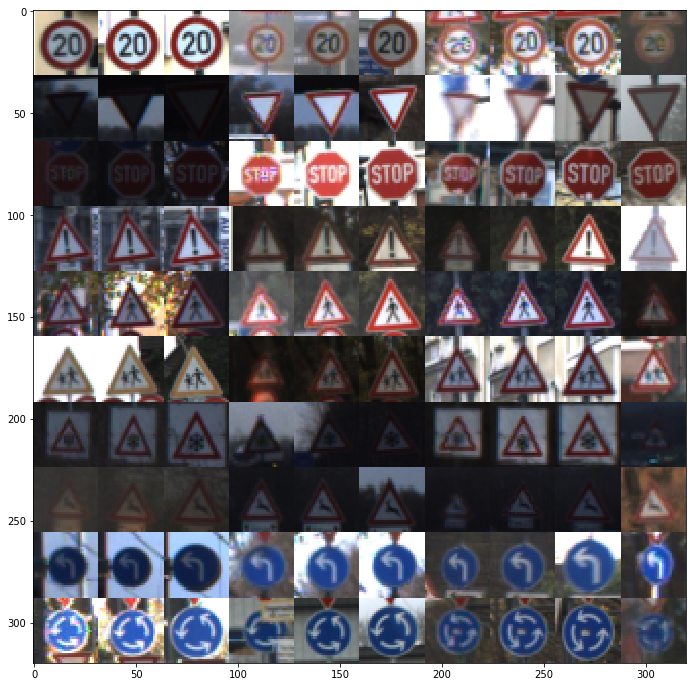

In [79]:
# Here we will look at several examples of the various signs
speed_limit_20km = np.concatenate([X_train[y_train==0,:,:,:][k*10,:,:] for k in range(10)],axis=1)
yield_sign = np.concatenate([X_train[y_train==13,:,:,:][k*10,:,:] for k in range(10)],axis=1)
stop_sign = np.concatenate([X_train[y_train==14,:,:,:][k*10,:,:] for k in range(10)],axis=1)
general_caution = np.concatenate([X_train[y_train==18,:,:,:][k*10,:,:] for k in range(10)],axis=1)
pedestrians = np.concatenate([X_train[y_train==27,:,:,:][k*10] for k in range(10)],axis=1)
children_crossing = np.concatenate([X_train[y_train==28,:,:,:][k*10] for k in range(10)],axis=1)
beware_of_ice = np.concatenate([X_train[y_train==30,:,:,:][k*10] for k in range(10)],axis=1)
wild_animals = np.concatenate([X_train[y_train==31,:,:,:][k*10] for k in range(10)],axis=1)
turn_left_ahead = np.concatenate([X_train[y_train==34,:,:,:][k*10,:,:] for k in range(10)],axis=1)
roundabout = np.concatenate([X_train[y_train==40,:,:,:][k*10,:,:] for k in range(10)],axis=1)

# Plot
plt.figure(figsize=(12,12))
plt.imshow(np.concatenate([
    speed_limit_20km, yield_sign, stop_sign,
    general_caution, pedestrians, children_crossing,
    beware_of_ice, wild_animals, turn_left_ahead,
    roundabout],axis=0))



## Preprocess the Data

In [80]:
# In the GAN project we did with celebrity faces, the images were scaled
# to the range [-0.5, 0.5].

# I will do that here again for now... b/c I'm still relying on a helper
#    fcn from that project at the end (show_generator_output)
def normalize(image_data, a=-0.5, b=0.5):
    """
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # y = a + (x - min(x))(b-a)/(max(x)-min(x))
    # y[x_min] = a
    # y[x_max] = a + (b-a) = b
    mn = image_data.min(); mx = image_data.max()
    return a + (image_data-mn)*(b-a)/(mx-mn) 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f801f3f5160>]], dtype=object)

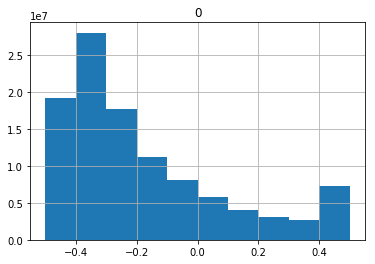

In [81]:
x_trn_nrm = normalize(X_train)
pd.DataFrame(x_trn_nrm.reshape(-1,1)).hist()

## Model Inputs
This function creates TF Placeholders for the Neural Network:
* Real input images placeholder with rank 4 using image_width, image_height, and image_channels.
* Z input placeholder with rank 2 using z_dim.
* Learning rate placeholder with rank 0.

The function returns the placeholders as a tuple:
* (tensor of real input images, tensor of z data)

In [82]:
def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    fake = tf.placeholder(tf.float32, shape=(None, z_dim))
    lrn_rt   = tf.placeholder(tf.float32)

    return real, fake, lrn_rt

## Discriminator
* This function implements the GAN's discriminator. 
* By using a scope name with `tf.variable_scope`, it is able to reuse the variables in the neural network. 
* The discriminator function returns a tuple:
    - (tensor output of the discriminator, tensor logits of the discriminator)

In [140]:
# For some reason, the self-driving car nanodegree uses TensorFlow version 0.12, so I've
#   had to modify this code:  
#     * tf.layers --> tf.contrib.layers
#     * tf.layers.dense --> tf.contrib.layers.fully_connected
#     * tf.layers.batch_normalization --> tf.contrib.layers.batch_norm
#         -- also, its parameters training -> is_training
#     * tf.contrib.layers.conv2d_traspose parameters 
#         -- strides --> stride
#         -- filters --> num_outputs
#         -- kernel_initializer --> weights_initializer
#      * tf.contrib.layers.conv2d parameter:  
#         -- padding must be capitalizer (e.g., 'SAME')
#         -- strides --> stride
#         -- kernel_initializer --> weights_initializer
#      * tf.nn.sigmoid_cross_entropy_with_logits: 
#         -- arguments are not named, but are positional fcn(logits, labels)

def discriminator(images, reuse=False, alpha=0.1, keep_prob=0.9):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope("discriminator", reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.contrib.layers.conv2d(images, 64, 5, stride=2, padding='SAME',
                             weights_initializer = tf.contrib.layers.xavier_initializer())
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 14x14x64
        
        x2 = tf.contrib.layers.conv2d(x1, 128, 5, stride=2, padding='SAME',
                             weights_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.contrib.layers.batch_norm(x2, is_training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob)
        # 7x7x128
        
        x3 = tf.contrib.layers.conv2d(x2, 256, 5, stride=1, padding='SAME',
                             weights_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.contrib.layers.batch_norm(x3, is_training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.contrib.layers.fully_connected(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits

## Generator
* This function implements the GAN's generator, which attempts to generate new images using learned hidden states. 
* By using a scope name with `tf.variable_scope`, it is able to reuse the variables in the neural network. 
* The function should return the generated 28 x 28 x out_channel_dim images.

In [141]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1, keep_prob=0.9):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :param reuse: Parameter to specify if variables should be reused
    :return: The tensor output of the generator
    """
    reuse = not is_train
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        x1 = tf.contrib.layers.fully_connected(z, 7*7*256)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.contrib.layers.batch_norm(x1, is_training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 7x7x256
        
        x2 = tf.contrib.layers.conv2d_transpose(x1, num_outputs=128, kernel_size=5, stride=1, padding='SAME',
                                       weights_initializer = tf.contrib.layers.xavier_initializer())
        x2 = tf.contrib.layers.batch_norm(x2, is_training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob)
        
        x3 = tf.contrib.layers.conv2d_transpose(x2, num_outputs=64, kernel_size=5, stride=2, padding='SAME',
                                       weights_initializer = tf.contrib.layers.xavier_initializer())
        x3 = tf.contrib.layers.batch_norm(x3, is_training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob)
        
        x4 = tf.contrib.layers.conv2d_transpose(x3, num_outputs=64, kernel_size=5, stride=2, padding='SAME',
                                       weights_initializer = tf.contrib.layers.xavier_initializer())
        x4 = tf.contrib.layers.batch_norm(x4, is_training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        x4 = tf.nn.dropout(x4, keep_prob)
        
        # Output layer
        logits = tf.contrib.layers.conv2d_transpose(
            x3, num_outputs = out_channel_dim, kernel_size=5, stride=2, 
            padding='SAME', weights_initializer = tf.contrib.layers.xavier_initializer())
        # 28 x 28 x out_channel_dim 
        
        out = tf.tanh(logits)
        
        return out

## Loss
This function computes the discriminator and generator loss.  

In [142]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            d_logits_real, 
            tf.ones_like(d_logits_real)*(1 - smooth)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            d_logits_fake, 
            tf.zeros_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            d_logits_fake, 
            tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss

## Optimization
This function creates the optimization operations for the GANs. 
* Uses tf.trainable_variables to get all the trainable variables
* Filters the variables with names that are in the discriminator and generator scope names
* Returns a tuple: (discriminator training operation, generator training operation)

In [143]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt

## Some Helper Fcns for GAN Training

In [144]:
from PIL import Image
def images_square_grid(images, mode):
    """
    Save images as a square grid
    :param images: Images to be used for the grid
    :param mode: The mode to use for images
    :return: Image of images in a square grid
    """
    # Get maximum size for square grid of images
    save_size = np.floor(np.sqrt(images.shape[0]))

    # Scale to 0-255
    images = (((images - images.min()) * 255) / (images.max() - images.min())).astype(np.uint8)

    # Put images in a square arrangement
    images_in_square = np.reshape(
            images[:save_size*save_size],
            (save_size, save_size, images.shape[1], images.shape[2], images.shape[3]))
    if mode == 'L':
        images_in_square = np.squeeze(images_in_square, 4)

    # Combine images to grid image
    new_im = Image.new(mode, (images.shape[1] * save_size, images.shape[2] * save_size))
    for col_i, col_images in enumerate(images_in_square):
        for image_i, image in enumerate(col_images):
            im = Image.fromarray(image, mode)
            new_im.paste(im, (col_i * images.shape[1], image_i * images.shape[2]))
    return new_im


def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode, alpha=0.1):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False, alpha=alpha),
        feed_dict={input_z: example_z})

    images_grid = images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()
    

class Dataset(object):
    """
    Dataset
    """
    def __init__(self, rgb_or_gray, np_images):
        """
        Initalize the class
        :param dataset_name: Database name
        :param np_images: Numpy Array of Images
        """
        color = rgb_or_gray.lower()[0]
        IMAGE_WIDTH = 32
        IMAGE_HEIGHT = 32

        if color == 'r':
            self.image_mode = 'RGB'
            image_channels = 3

        elif color == 'g':
            self.image_mode = 'L'
            image_channels = 1

        self.np_images = np_images
        self.shape = len(np_images), IMAGE_WIDTH, IMAGE_HEIGHT, image_channels

    def get_batches(self, batch_size):
        """
        Generate batches
        :param batch_size: Batch Size
        :return: Batches of data
        """
        IMAGE_MAX_VALUE = 255
        current_index = 0
        while current_index + batch_size <= self.shape[0]:
            data_batch = self.np_images[current_index:current_index + batch_size]
            current_index += batch_size
            yield data_batch / IMAGE_MAX_VALUE - 0.5



## GAN Training

In [145]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,
         alpha=0.1, smooth=0.1, print_every=10, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    :param alpha: leaky relu parameter
    :param smooth: "soft loss" smoothing parameter
    """        
    img_w = data_shape[1]
    img_h = data_shape[2]
    img_c = data_shape[3] # or coulud be: len(data_image_mode)
            
    # Get placeholders
    input_real, input_z, lrn_rt = model_inputs(img_w, img_h, img_c, z_dim)
        
    d_loss, g_loss = model_loss(input_real, input_z, img_c, alpha=alpha, smooth=smooth)
        
    d_opt, g_opt = model_opt(d_loss, g_loss, lrn_rt, beta1)
    

    # Train Model
    steps=0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                batch_images = 2*batch_images
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lrn_rt: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lrn_rt: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lrn_rt: learning_rate})
                
                
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, img_c, data_image_mode, alpha=alpha)

In [146]:
batch_size = 64
z_dim = 128
learning_rate = 0.0001
beta1 = 0.5
alpha=0.1
smooth=0.1
epochs = 1

dataset = Dataset('rgb', x_trn_nrm)

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, dataset.get_batches,
          dataset.shape, dataset.image_mode)


InvalidArgumentError: Input to reshape is a tensor with 1048576 values, but the requested shape requires a multiple of 12544
	 [[Node: discriminator/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](discriminator/dropout_2/mul, discriminator/Reshape/shape)]]
	 [[Node: discriminator_1/BatchNorm/moments/sufficient_statistics/Shape/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_6442_discriminator_1/BatchNorm/moments/sufficient_statistics/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'discriminator/Reshape', defined at:
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-146-66c97b2fe263>", line 13, in <module>
    dataset.shape, dataset.image_mode)
  File "<ipython-input-145-900c98923b1d>", line 23, in train
    d_loss, g_loss = model_loss(input_real, input_z, img_c, alpha=alpha, smooth=smooth)
  File "<ipython-input-142-51a042595f05>", line 10, in model_loss
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
  File "<ipython-input-140-f991cf6eaa1b>", line 48, in discriminator
    flat = tf.reshape(x3, (-1, 7*7*256))
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2448, in reshape
    name=name)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 1048576 values, but the requested shape requires a multiple of 12544
	 [[Node: discriminator/Reshape = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/gpu:0"](discriminator/dropout_2/mul, discriminator/Reshape/shape)]]
	 [[Node: discriminator_1/BatchNorm/moments/sufficient_statistics/Shape/_15 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_6442_discriminator_1/BatchNorm/moments/sufficient_statistics/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [138]:
help(tf.nn.sigmoid_cross_entropy_with_logits)

Help on function sigmoid_cross_entropy_with_logits in module tensorflow.python.ops.nn:

sigmoid_cross_entropy_with_logits(logits, targets, name=None)
    Computes sigmoid cross entropy given `logits`.
    
    Measures the probability error in discrete classification tasks in which each
    class is independent and not mutually exclusive.  For instance, one could
    perform multilabel classification where a picture can contain both an elephant
    and a dog at the same time.
    
    For brevity, let `x = logits`, `z = targets`.  The logistic loss is
    
          z * -log(sigmoid(x)) + (1 - z) * -log(1 - sigmoid(x))
        = z * -log(1 / (1 + exp(-x))) + (1 - z) * -log(exp(-x) / (1 + exp(-x)))
        = z * log(1 + exp(-x)) + (1 - z) * (-log(exp(-x)) + log(1 + exp(-x)))
        = z * log(1 + exp(-x)) + (1 - z) * (x + log(1 + exp(-x))
        = (1 - z) * x + log(1 + exp(-x))
        = x - x * z + log(1 + exp(-x))
    
    For x < 0, to avoid overflow in exp(-x), we reformulate the a